# TP OpenMP - October 2022
## Part 1 : Pi

### Compilation and performance evaluation

In [34]:
!make p1

### Performance analysis
#### Weak scaling

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


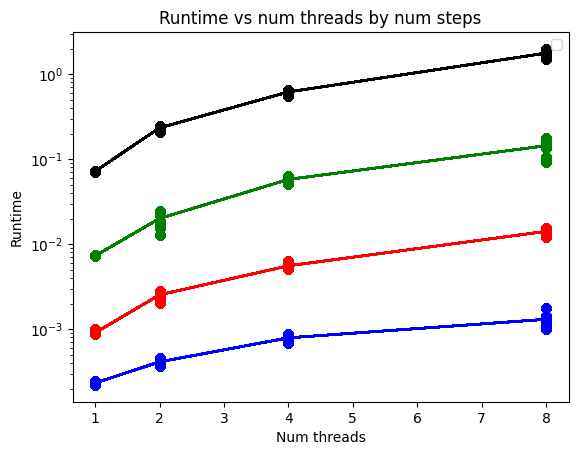

In [44]:
from cProfile import label
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('metrics_part_1.csv')

color_num_steps = {10000 : "blue", 100000 : "red", 1000000 : "green", 10000000 : "black"}

for num_steps in df['num_steps']:
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['method'] == "atomic"]
    
    mean_stats = df_plot.groupby(['num_steps','method','num_threads']).mean().reset_index()
    
    plt.plot(mean_stats['num_threads'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.scatter(df_plot['num_threads'], df_plot['runtime'],color=color_num_steps[num_steps])

    df_plot = df[(df['num_steps'] == num_steps) & (df['method'] == "reduce")]
    mean_stats = df_plot.groupby(['num_steps','method','num_threads']).mean().reset_index()
    
    plt.plot(mean_stats['num_threads'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.scatter(df_plot['num_threads'], df_plot['runtime'],color=color_num_steps[num_steps])
    
plt.xlabel("Num threads")
plt.ylabel("Runtime")
plt.title("Runtime vs num threads by num steps")
plt.legend()
plt.show()

Text(0, 0.5, 'Runtime')

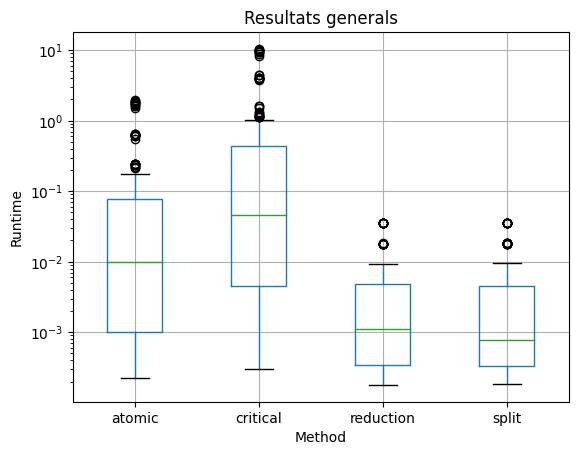

In [36]:
df_threads = df.pivot(columns='method', values='runtime')
df_threads.boxplot()
plt.yscale('log')
plt.title('Resultats generals')
plt.xlabel('Method')
plt.ylabel('Runtime')

Dans le dernier diagramme, nous avons les résultats généraux de toutes les exécutions, tous le `num_threads` et `num_steps` avec une répétition de 10 fois par chaque exécution. 

Nous pouvons regarder que la méthode critical est le pire entre toutes les méthodes. Avec un moyen entre e-2 et e-1. Ce résultat démontre que les sections critical dans des logiciels concurrents doit être pensé avec calme parce qu'ils peuvent faire tout le logiciel de perdre de performance. Par le contraire, les méthodes sans sections critiques sont plus vite. Dans ce cas réduction et split (qu'utilise réduction) sont plus vites avec un moyen proche à e-3. Nous pouvons regarder que même dans la pire exécution de réduction ou split, il est plus vite que le moyen de critical. Aussi, nous pouvons regarder que même si le moyen de split dit que split est plus vite que réduction, la déviation standard est presque la même. Le meilleur cas de réduction est presque le même que le meilleur de split. 

Comment conclusion, nous pouvons dire que pour problèmes similors est meilleur utiliser réduction, mais c'est important de visualiser qu'il utilise plus de mémoire dans la machine. Donc, si les donnes permis, nous pouvons utiliser réduction et seulement si la différence est vraiment grande, nous pouvons utiliser split. La méthode split n'est pas le meilleur dans tous les cas, car il fait le code plus complexe, mais il peut être efficient dans le cas qu'on a réellement beaucoup de donnes et pas suffisent de mémoire.